In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [3]:
df = pd.read_csv(r"D:\Imarticus\Machine Learning\Linear regression\cost_prediction.csv")

In [4]:
df

,age,sex,smoker,region,blood_pressure,cholesterol,glucose,exercise_hours_per_week,alcohol_consumption,diet_score,medical_cost
0,56.0,female,yes,northeast,105.0,171.0,154.0,1.6,5.8,7,32272.79
1,46.0,female,no,northeast,101.0,154.0,142.0,8.7,5.7,6,12004.64
2,32.0,male,no,southeast,105.0,288.0,NaN,4.9,4.7,6,10698.80
3,60.0,male,no,southeast,125.0,288.0,NaN,1.7,2.3,2,17104.45
4,25.0,female,no,northwest,91.0,288.0,135.0,8.9,3.8,6,7706.10
...,...,...,...,...,...,...,...,...,...,...,...
4576,28.0,male,no,northeast,119.0,239.0,135.0,5.4,6.7,9,11131.31
4577,33.0,female,no,northwest,123.0,224.0,108.0,1.3,0.5,7,6202.71
4578,35.0,female,no,southwest,141.0,234.0,97.0,10.0,3.8,10,13863.63
4579,47.0,male,no,southwest,128.0,154.0,103.0,10.7,0.4,5,17303.44


In [5]:
df.describe()

,age,blood_pressure,cholesterol,glucose,exercise_hours_per_week,alcohol_consumption,diet_score,medical_cost
count,4398.000000,4444.000000,4352.000000,4307.000000,4581.000000,4581.000000,4581.000000,4581.000000
mean,41.257162,119.892664,224.527114,124.811702,5.916699,4.980965,5.527177,17771.693794
std,13.506643,17.167312,43.172833,31.373535,3.466743,2.867899,2.865236,7708.657213
min,18.000000,90.000000,150.000000,70.000000,0.000000,0.000000,1.000000,-508.780000
25%,30.000000,105.000000,187.000000,98.000000,2.900000,2.600000,3.000000,12363.010000
50%,41.000000,120.000000,225.000000,125.000000,5.900000,4.900000,6.000000,16542.090000
75%,53.000000,135.000000,262.000000,152.000000,8.900000,7.400000,8.000000,21694.590000
max,64.000000,149.000000,299.000000,179.000000,12.000000,10.000000,10.000000,45024.920000


In [6]:
df.shape

(4581, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4581 entries, 0 to 4580
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      4398 non-null   float64
 1   sex                      4581 non-null   object 
 2   smoker                   4581 non-null   object 
 3   region                   4581 non-null   object 
 4   blood_pressure           4444 non-null   float64
 5   cholesterol              4352 non-null   float64
 6   glucose                  4307 non-null   float64
 7   exercise_hours_per_week  4581 non-null   float64
 8   alcohol_consumption      4581 non-null   float64
 9   diet_score               4581 non-null   int64  
 10  medical_cost             4581 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 393.8+ KB


In [8]:
df.isnull().sum()

age                        183
sex                          0
smoker                       0
region                       0
blood_pressure             137
cholesterol                229
glucose                    274
exercise_hours_per_week      0
alcohol_consumption          0
diet_score                   0
medical_cost                 0
dtype: int64

In [9]:
df['age'].median()

41.0

In [10]:
df['age'] = df['age'].fillna(df['age'].median())

In [11]:
df.isnull().sum()

age                          0
sex                          0
smoker                       0
region                       0
blood_pressure             137
cholesterol                229
glucose                    274
exercise_hours_per_week      0
alcohol_consumption          0
diet_score                   0
medical_cost                 0
dtype: int64

In [12]:
df['blood_pressure'].mean()

np.float64(119.89266426642665)

In [13]:
df['blood_pressure'] = df['blood_pressure'].fillna(df['blood_pressure'].median())

In [14]:
df['cholesterol'].median()

225.0

In [15]:
df['cholesterol'] = df['cholesterol'].fillna(df['cholesterol'].median())

In [16]:
df['glucose'].median()

125.0

In [17]:
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

In [18]:
x = df.drop('medical_cost', axis=1)
y = df['medical_cost']

In [19]:
x

,age,sex,smoker,region,blood_pressure,cholesterol,glucose,exercise_hours_per_week,alcohol_consumption,diet_score
0,56.0,female,yes,northeast,105.0,171.0,154.0,1.6,5.8,7
1,46.0,female,no,northeast,101.0,154.0,142.0,8.7,5.7,6
2,32.0,male,no,southeast,105.0,288.0,125.0,4.9,4.7,6
3,60.0,male,no,southeast,125.0,288.0,125.0,1.7,2.3,2
4,25.0,female,no,northwest,91.0,288.0,135.0,8.9,3.8,6
...,...,...,...,...,...,...,...,...,...,...
4576,28.0,male,no,northeast,119.0,239.0,135.0,5.4,6.7,9
4577,33.0,female,no,northwest,123.0,224.0,108.0,1.3,0.5,7
4578,35.0,female,no,southwest,141.0,234.0,97.0,10.0,3.8,10
4579,47.0,male,no,southwest,128.0,154.0,103.0,10.7,0.4,5


In [20]:
y

0       32272.79
1       12004.64
2       10698.80
3       17104.45
4        7706.10
          ...   
4576    11131.31
4577     6202.71
4578    13863.63
4579    17303.44
4580    12753.39
Name: medical_cost, Length: 4581, dtype: float64

In [21]:
x = pd.get_dummies(x, drop_first=True)

In [22]:
x

,age,blood_pressure,cholesterol,glucose,exercise_hours_per_week,alcohol_consumption,diet_score,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,56.0,105.0,171.0,154.0,1.6,5.8,7,False,True,False,False,False
1,46.0,101.0,154.0,142.0,8.7,5.7,6,False,False,False,False,False
2,32.0,105.0,288.0,125.0,4.9,4.7,6,True,False,False,True,False
3,60.0,125.0,288.0,125.0,1.7,2.3,2,True,False,False,True,False
4,25.0,91.0,288.0,135.0,8.9,3.8,6,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4576,28.0,119.0,239.0,135.0,5.4,6.7,9,True,False,False,False,False
4577,33.0,123.0,224.0,108.0,1.3,0.5,7,False,False,True,False,False
4578,35.0,141.0,234.0,97.0,10.0,3.8,10,False,False,False,False,True
4579,47.0,128.0,154.0,103.0,10.7,0.4,5,True,False,False,False,True


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42)

In [26]:
scale = StandardScaler()

In [27]:
x_train_scale = scale.fit_transform(x_train)   
x_test_scale = scale.transform(x_test)

In [28]:
LR = LinearRegression()

In [29]:
LR.fit(x_train_scale, y_train)

LinearRegression()

In [30]:
y_predict = LR.predict(x_test_scale)

In [31]:
y_predict

array([14683.70881597, 15207.35196265, 15448.22357389, ...,
       20342.39304817, 11259.00796215, 18367.24661669])

In [32]:
r2 = r2_score(y_test, y_predict)
r2*100

77.0684935411111

In [33]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

In [34]:
mae

2915.0939071838307

In [35]:
mse

13289179.55138415

In [36]:
rmse

np.float64(3645.4326974152395)

In [37]:
lasso = Lasso(alpha=0.01, )

In [38]:
lasso.fit(x_train_scale, y_train)

Lasso(alpha=0.01)

In [39]:
y_pred_lasso = lasso.predict(x_test_scale)

In [40]:
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_lasso*100

77.06851245159231

In [41]:
ridge = Ridge()

In [42]:
ridge.fit(x_train_scale, y_train)

Ridge()

In [43]:
y_pred_ridge = ridge.predict(x_test_scale)

In [44]:
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_ridge*100

77.07145064154646

In [45]:
elasticnet = ElasticNet()
elasticnet.fit(x_train_scale, y_train)

ElasticNet()

In [46]:
y_pred_elasticnet = elasticnet.predict(x_test_scale)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)
r2_elasticnet*100

69.24191294479705

In [48]:
r2_score_value = 77.06
lasso_score_value = 77.06
ridge_score_value = 77.07
elastic_score_value = 69.24

results = {'Model': ['R2', 'Lasso', 'Ridge', 'ElasticNet'],
           'Score': [r2_score_value, lasso_score_value, ridge_score_value, elastic_score_value]}

df_model_scores = pd.DataFrame(results)
print(df_model_scores)

        Model  Score
0          R2  77.06
1       Lasso  77.06
2       Ridge  77.07
3  ElasticNet  69.24


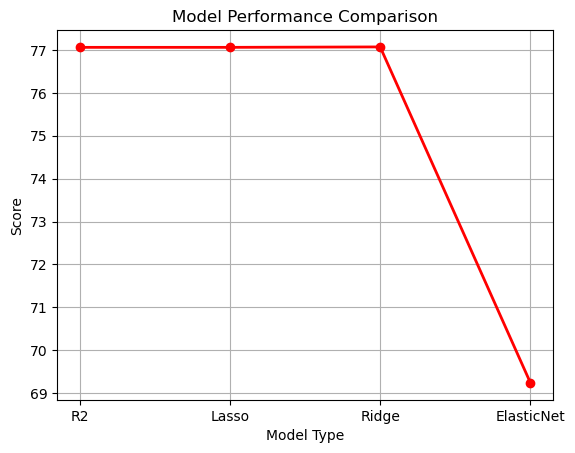

In [49]:
plt.plot(df_model_scores['Model'], df_model_scores['Score'], marker='o', linewidth=2, color='red')
plt.title("Model Performance Comparison")
plt.xlabel("Model Type")
plt.ylabel("Score")
plt.grid(True)
plt.show()

In [50]:
import pickle

# x is already encoded using pd.get_dummies
feature_columns = x.columns

with open("model.pkl", "wb") as file:
    pickle.dump(
        {
            "model": LR,          # or your model variable name
            "features": feature_columns
        },
        file
    )

print("Model and feature columns saved successfully!")

Model and feature columns saved successfully!
